In [10]:
import matplotlib.pyplot as plt

In [11]:
from app import create_app, db
from app.lib.ml_model import MLModel
from app.lib.ml_model_data import MLModelData

In [12]:
epochs = 400

In [13]:
with create_app().app_context():
    data = MLModelData(input_window=30, output_window=30, running_mean_window=14, train_valid_split=0.8)
    data.load()

In [14]:
from random import randrange
def sample_predictions(model, data, num_samples=3):
    # Select a random batch
    d = iter(data.dataloader_valid)
    for i in range(randrange(1, len(data.dataloader_valid))):
        x, y = next(d)
    py = model.predict(x * data.std + data.mean)
    for i in range(num_samples):
        # Select evenly spaced samples from the batch
        index = i * len(x) // num_samples
        plt.plot(range(30), x[index].cpu() * data.std + data.mean)
        plt.plot(range(30, 60), (y[index].cpu() + x[index][-1].cpu()) * data.std + data.mean)
        plt.plot(range(30, 60), py[index].cpu().detach())
        plt.show()

In [15]:
model = MLModel(input_window=30, output_window=30, data_mean=data.mean, data_std=data.std)

In [16]:
%time train_losses, valid_losses = model.fit(epochs, data.dataloader_train, data.dataloader_valid)

0, 0.22310447692871094, 37.082733154296875
1, 0.13619689643383026, 8.794326782226562
2, 0.11705032736063004, 12.48629379272461
3, 0.10658367723226547, 15.181745529174805
4, 0.09568458050489426, 9.31783390045166
5, 0.08938594907522202, 10.859532356262207
6, 0.07606076449155807, 11.028923988342285
7, 0.06826630979776382, 8.373144149780273
8, 0.06503870338201523, 7.292043685913086
9, 0.05683695897459984, 9.949094772338867
10, 0.03827734664082527, 7.706013202667236
11, 0.04561582952737808, 9.421723365783691
12, 0.03979860991239548, 5.454875469207764
13, 0.04253567382693291, 5.620708465576172
14, 0.03530368208885193, 8.68438720703125
15, 0.027888057753443718, 6.157700538635254
16, 0.0276215560734272, 8.254645347595215
17, 0.03734637796878815, 5.976181983947754
18, 0.047793809324502945, 6.730441093444824
19, 0.05070995166897774, 5.554706573486328
20, 0.03295547887682915, 8.036701202392578
21, 0.026374122127890587, 5.817901134490967
22, 0.02209831029176712, 5.33258056640625
23, 0.022133596241

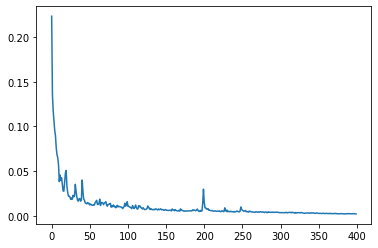

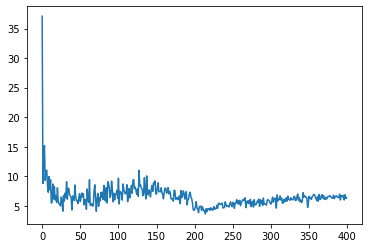

In [17]:
plt.plot(train_losses)
plt.show()
plt.plot(valid_losses)
plt.show()

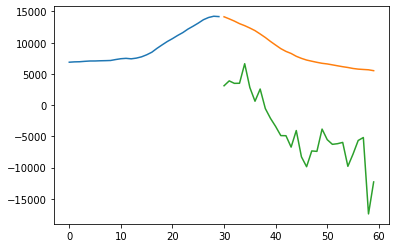

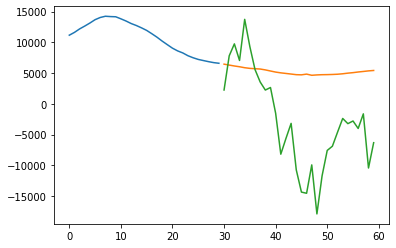

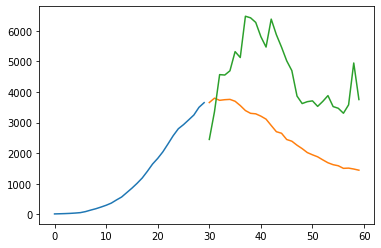

In [18]:
sample_predictions(model, data)

In [19]:
model.save('./model.pt')